In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})

from sklearn.datasets import make_circles

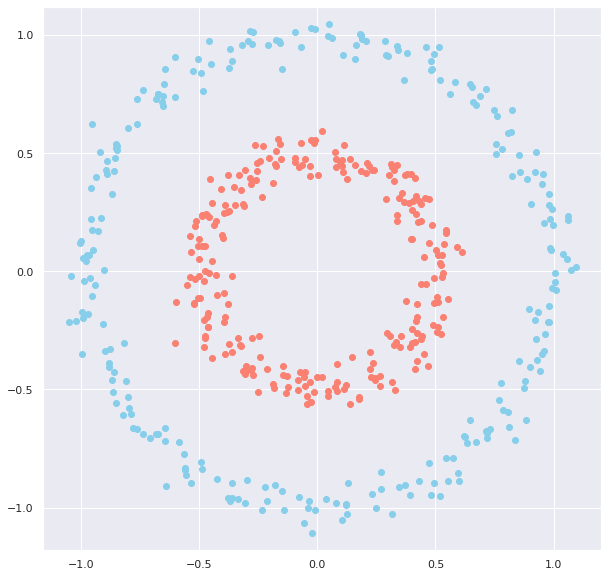

In [2]:
#CREAR  EL DATASET
# n es l cantidad de registros
n=500
# p es la cantidad de atributos por registro
p=2
#Hacer dos circulos diferenciados por el vector Y
X , Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0]==0,0], X[Y[:, 0]==0,1], c="skyblue")
plt.scatter(X[Y[:, 0]==1,0], X[Y[:, 0]==1,1], c="salmon")
plt.axis("equal")
plt.show()

In [3]:
# CLASE DE LA CAPA DE RED
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f= act_f
    self.b = np.random.rand(1, n_neur) * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1


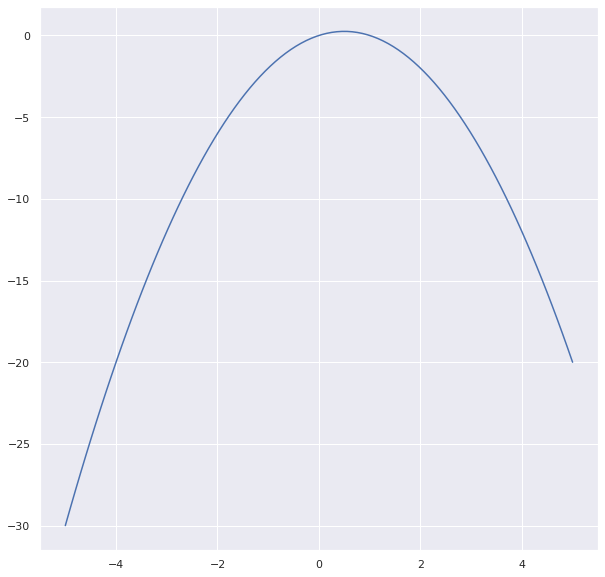

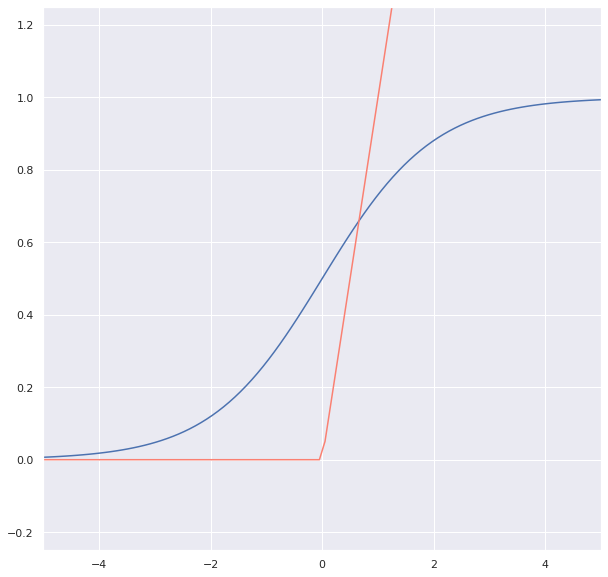

In [34]:
# FUNCIONES DE ACTIVACION (sigma)
sigm = (lambda x: 1/(1+np.e**(-x)),
        lambda x: x * (1-x))   # La definimos así ya que cuando le pasemos x, será equivalente a pasarle la función anterior

relu = lambda x: np.maximum(0,x)

_x = np.linspace(-5,5,100)
plt.plot(_x, sigm[1](_x))
plt.show()

_x = np.linspace(-5,5,100)
plt.plot(_x, sigm[0](_x))
plt.plot(_x, relu(_x), c="salmon")
plt.axis([-5, 5, -0.25, 1.25])
plt.show()

In [35]:
#CREAR LA ESTRUCTURA DE DATOS QEU SOPORTA LA RED NEURONAL

# LA LOGICA ES (#conecciones, #neuronas, funcion de activacion)
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
#....

#se puede hacer iterativo
def create_nn(topology, act_f):
  nn = []
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
  return nn



In [42]:
#montar la red para el backpropagation y el gradeint descent

topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr)**2),
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  out= [(None, X)]

  #Forward pass
  for l, layer in enumerate(neural_net):

    z = out[-1][1].dot(neural_net[l].W) + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z, a))

  # print(l2_cost[0](out[-1][1], Y))


  if train:
    #Backward pass
    deltas = []

    for l in reversed(range(0, len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]

      # print(a.shape)

      if l == len(neural_net)-1:
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
      _W = neural_net[l].W

      #GRADIENT DESCENT
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

  return out [-1][1]

train(neural_net, X, Y, l2_cost, 0.5)

array([[0.78972318],
       [0.78519141],
       [0.77932576],
       [0.78044303],
       [0.78325543],
       [0.78614166],
       [0.78523025],
       [0.78230974],
       [0.78740611],
       [0.78253496],
       [0.78690389],
       [0.79096407],
       [0.7881596 ],
       [0.78255907],
       [0.78325684],
       [0.78643156],
       [0.79166194],
       [0.78342462],
       [0.78814859],
       [0.78504127],
       [0.78859261],
       [0.78341312],
       [0.778734  ],
       [0.78816062],
       [0.78320256],
       [0.78189862],
       [0.77996594],
       [0.78067716],
       [0.78455901],
       [0.77902001],
       [0.78821935],
       [0.78591151],
       [0.78940405],
       [0.78654228],
       [0.77875127],
       [0.78420444],
       [0.7838473 ],
       [0.78575531],
       [0.78805187],
       [0.79100862],
       [0.78918444],
       [0.78248116],
       [0.78280589],
       [0.78381134],
       [0.78886963],
       [0.78745451],
       [0.7863861 ],
       [0.792

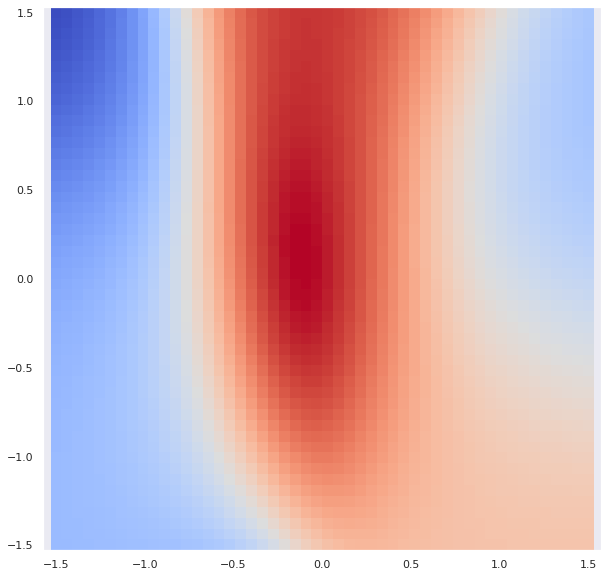

KeyboardInterrupt: ignored

In [51]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss=[]

for i in range(2500):
  #entrenemos a las red
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)

  if i % 25 == 0:
    #print(pY)
    loss.append(l2_cost[0](pY, Y))
    res=50

    _x0 = np.linspace(-1.5,1.5, res)
    _x1 = np.linspace(-1.5,1.5, res)

    _Y = np.zeros((res,res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0]== 0, 0], X[Y[:,0]== 0, 1], c = "skyblue")
    plt.scatter(X[Y[:,0]== 1, 0], X[Y[:,0]== 1, 1], c = "salmon")

    clear_output(wait=True)
    plt.show()


    plt.plot(range(len(loss)), loss)
    plt.axis([0, 100, 0, 0.3])
    plt.show()
    time.sleep(0.2)
    print(i, "/2500 iterations")


525 /2500 iterations


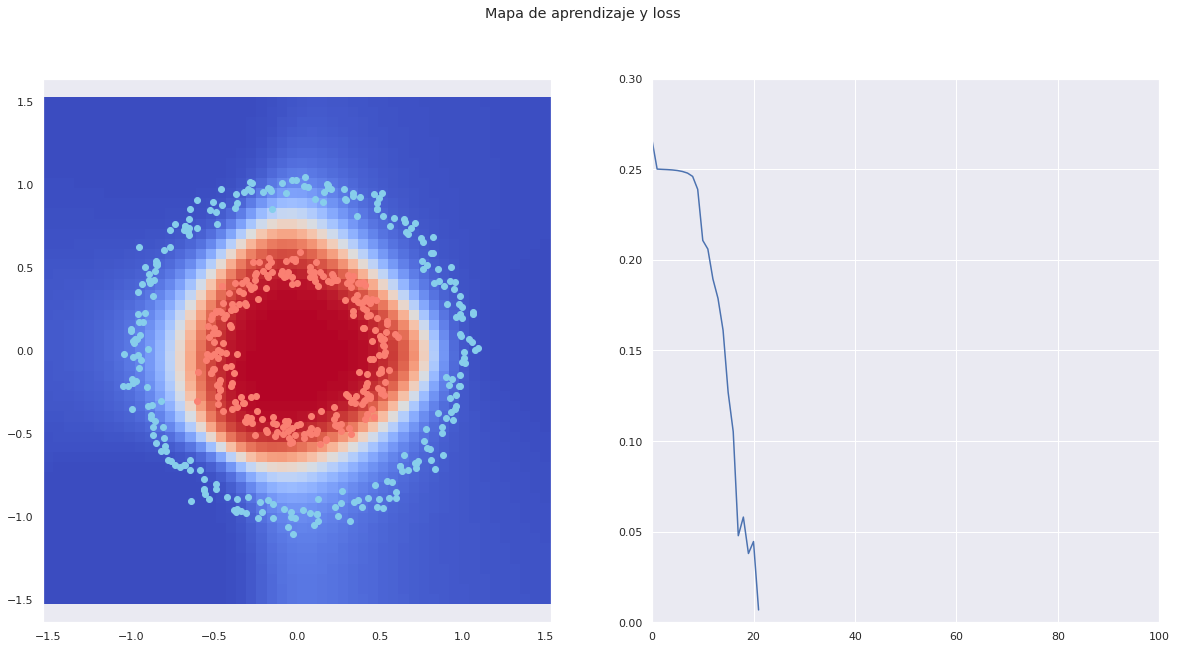

In [61]:
sns.set(rc={'figure.figsize':(20,10)})
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Mapa de aprendizaje y loss')
 
ax1.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
ax1.axis("equal")

ax1.scatter(X[Y[:,0]== 0, 0], X[Y[:,0]== 0, 1], c = "skyblue")
ax1.scatter(X[Y[:,0]== 1, 0], X[Y[:,0]== 1, 1], c = "salmon")

clear_output(wait=True)
#ax1.show()


ax2.plot(range(len(loss)), loss)
ax2.axis([0, 100, 0, 0.3])
#ax2.show()
print(i, "/2500 iterations")





# plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
# plt.axis("equal")
# ax1.plot(x, y)
# ax2.plot(x, -y)

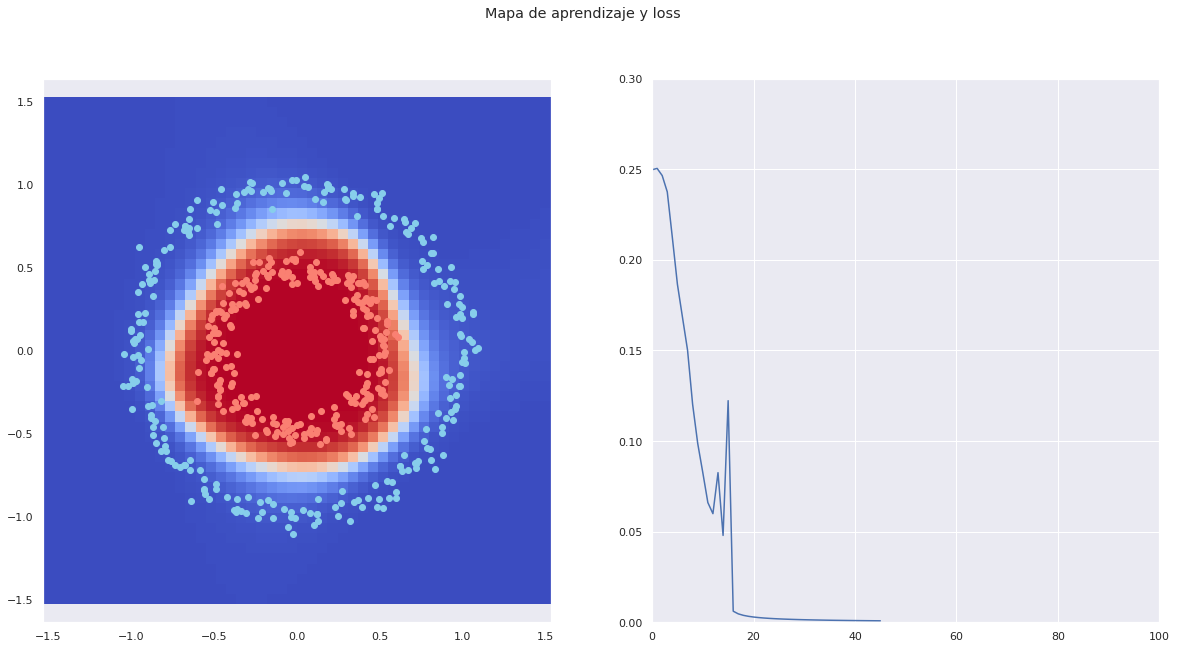

Iterations: 1125 /2500
loss: 0.0008247547021181151


KeyboardInterrupt: ignored

<Figure size 1440x720 with 0 Axes>

In [73]:
import time
sns.set(rc={'figure.figsize':(20,10)})
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss=[]

for i in range(2500):
  #entrenemos a las red
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)

  if i % 25 == 0:
    #print(pY)
    loss.append(l2_cost[0](pY, Y))
    res=50

    _x0 = np.linspace(-1.5,1.5, res)
    _x1 = np.linspace(-1.5,1.5, res)

    _Y = np.zeros((res,res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Mapa de aprendizaje y loss')
 
    ax1.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    ax1.axis("equal")

    ax1.scatter(X[Y[:,0]== 0, 0], X[Y[:,0]== 0, 1], c = "skyblue")
    ax1.scatter(X[Y[:,0]== 1, 0], X[Y[:,0]== 1, 1], c = "salmon")

    clear_output(wait=True)
    

    ax2.plot(range(len(loss)), loss)
    ax2.axis([0, 100, 0, 0.3])
    plt.show()
    time.sleep(0)
    print("Iterations:", i, "/2500")
    print("loss:", loss[-1])
